# Import Libraries and Load Data 

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [67]:
data.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
data.tail(5)

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 7 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   age       1338 non-null   int64  

 1   sex       1338 non-null   object 

 2   bmi       1338 non-null   float64

 3   children  1338 non-null   int64  

 4   smoker    1338 non-null   object 

 5   region    1338 non-null   object 

 6   charges   1338 non-null   float64

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB


In [115]:
data.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.428010

In [116]:
data.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

In [117]:
data.shape

(1338, 7)

# Data Cleaning and Visulization

In [118]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

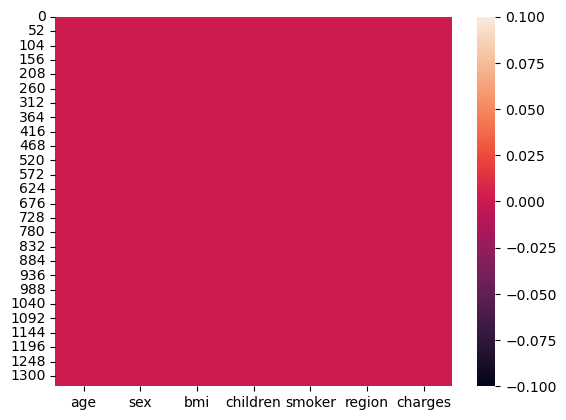

In [11]:
sns.heatmap(data.isnull())

<AxesSubplot:>

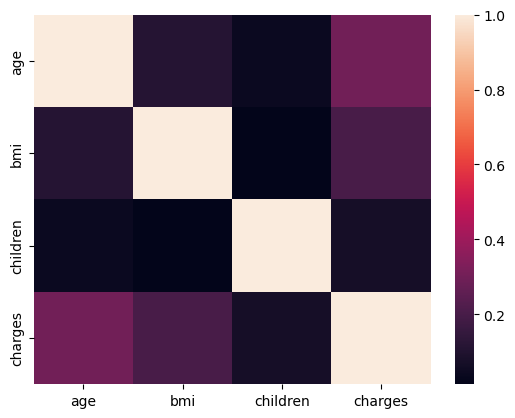

In [12]:
sns.heatmap(data.corr())

<AxesSubplot:>

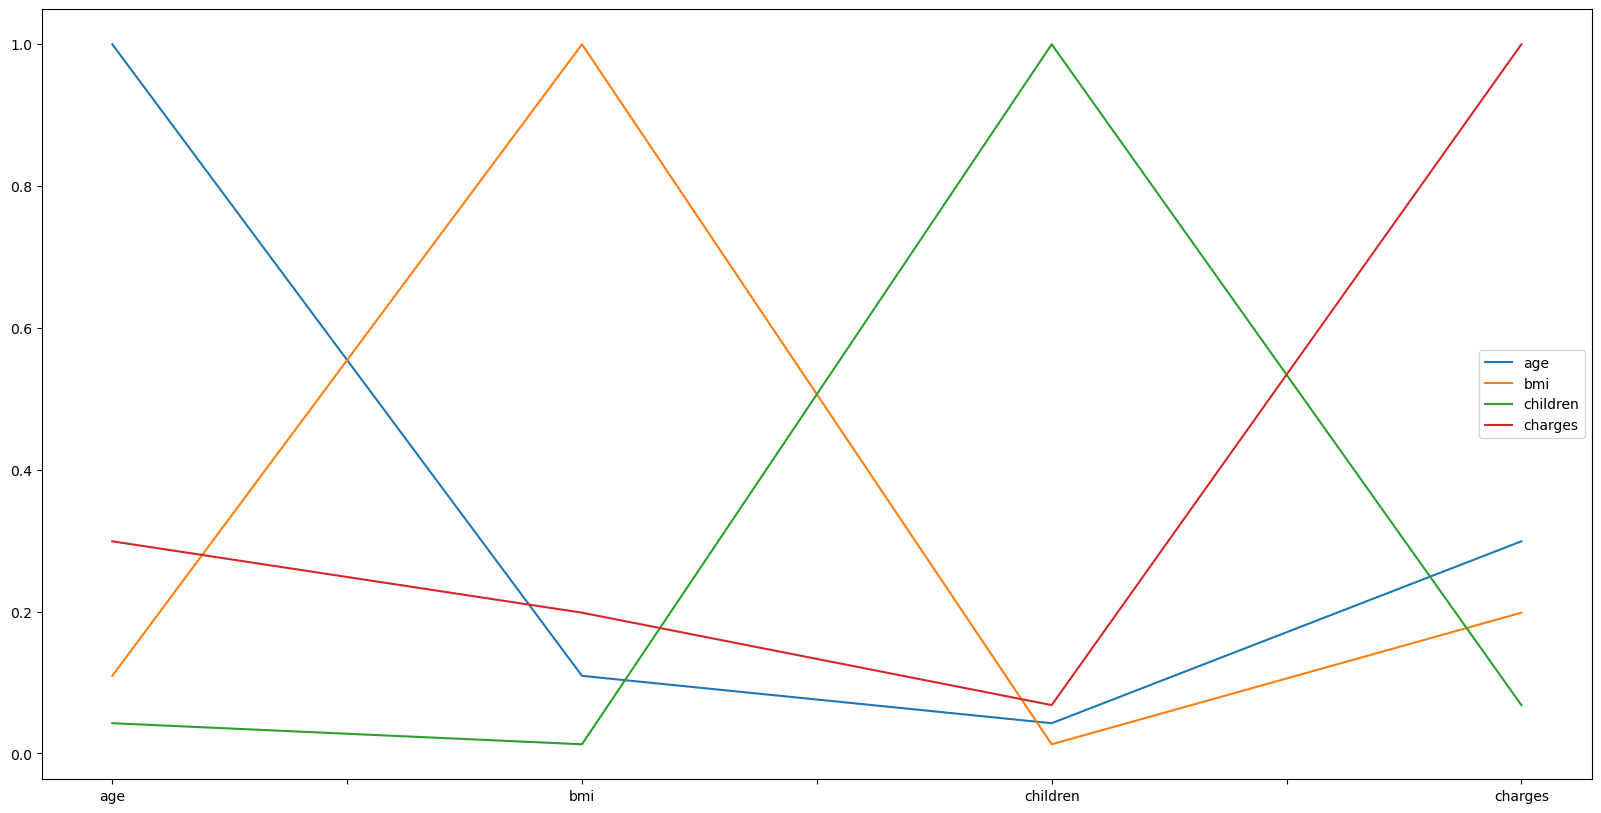

In [17]:
data_corr = data.corr()
data_corr.plot(figsize=(20,10))

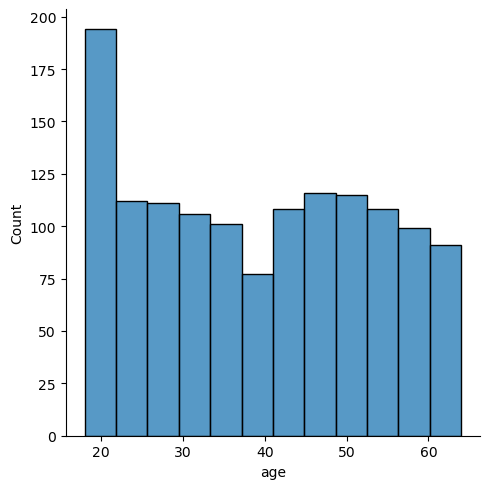

In [14]:
sns.displot(data['age'])

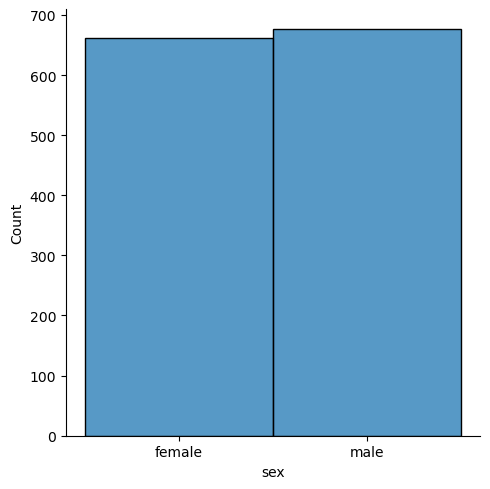

In [15]:
sns.displot(data['sex'])

AxesSubplot(0.1275,0.11;0.77x0.77)


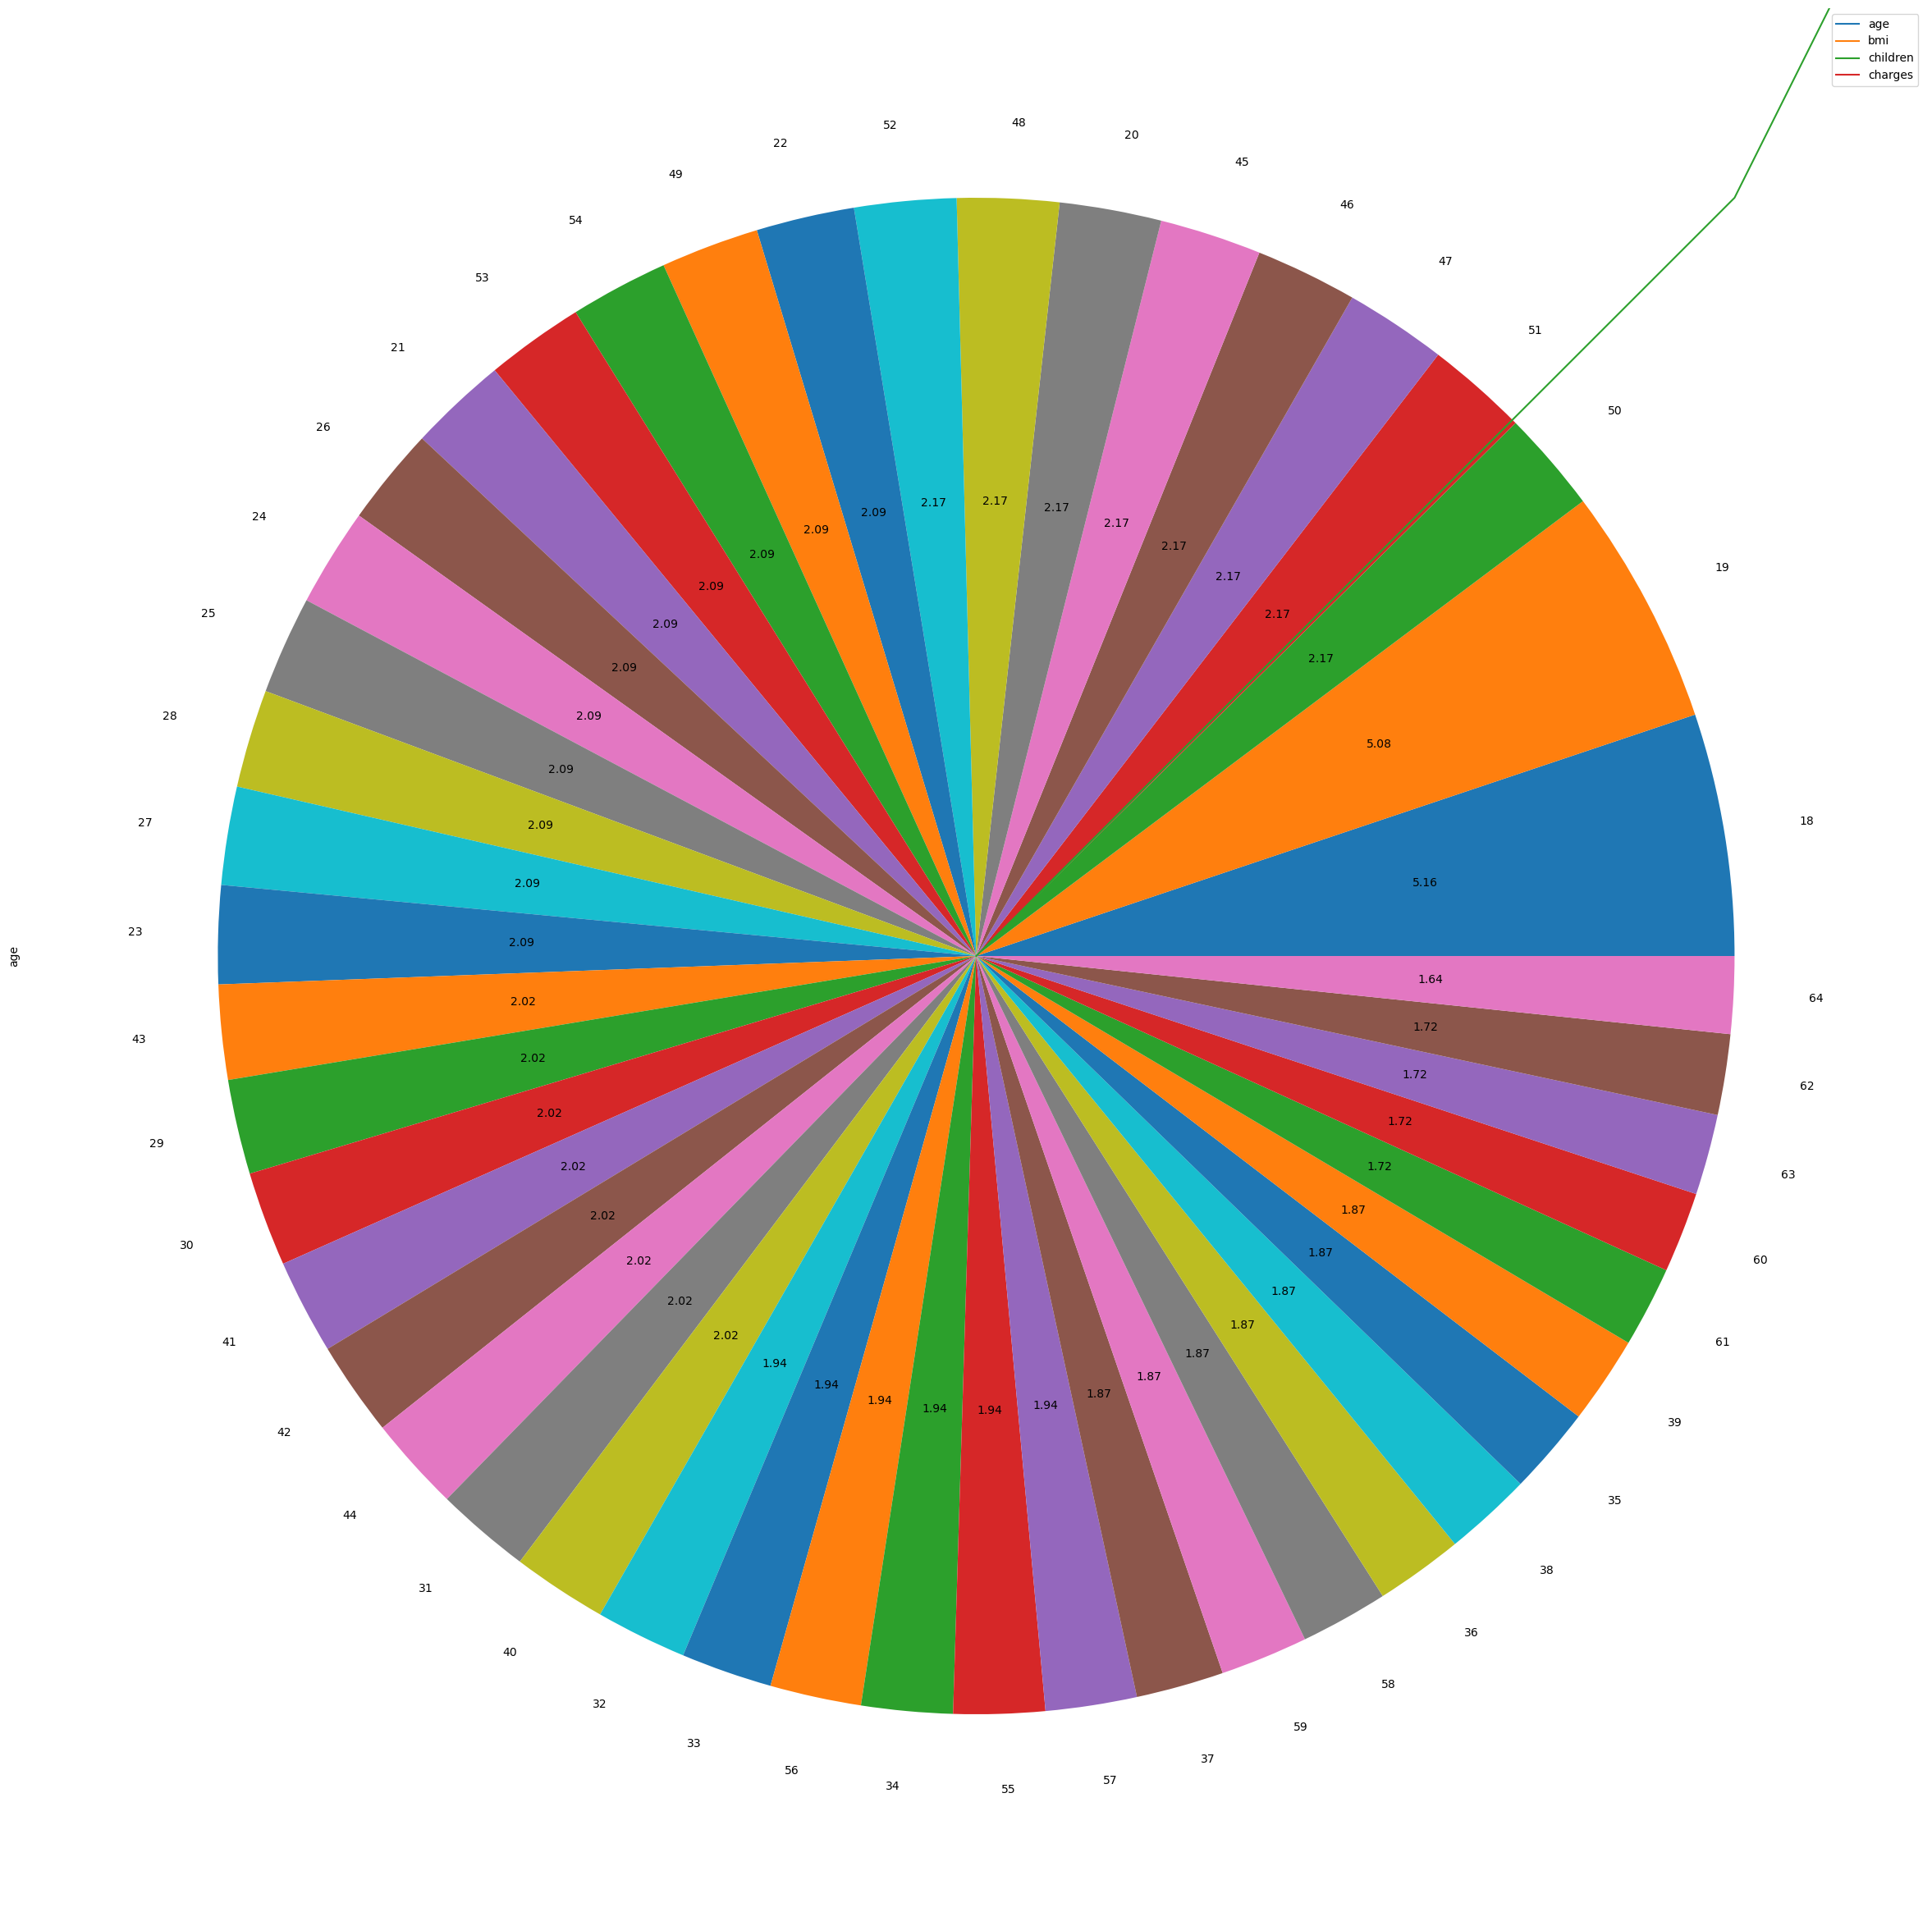

In [28]:
data.plot(figsize=(30,30))
print(data['age'].value_counts().plot(kind='pie',autopct='%.2f'))

AxesSubplot(0.1275,0.11;0.77x0.77)


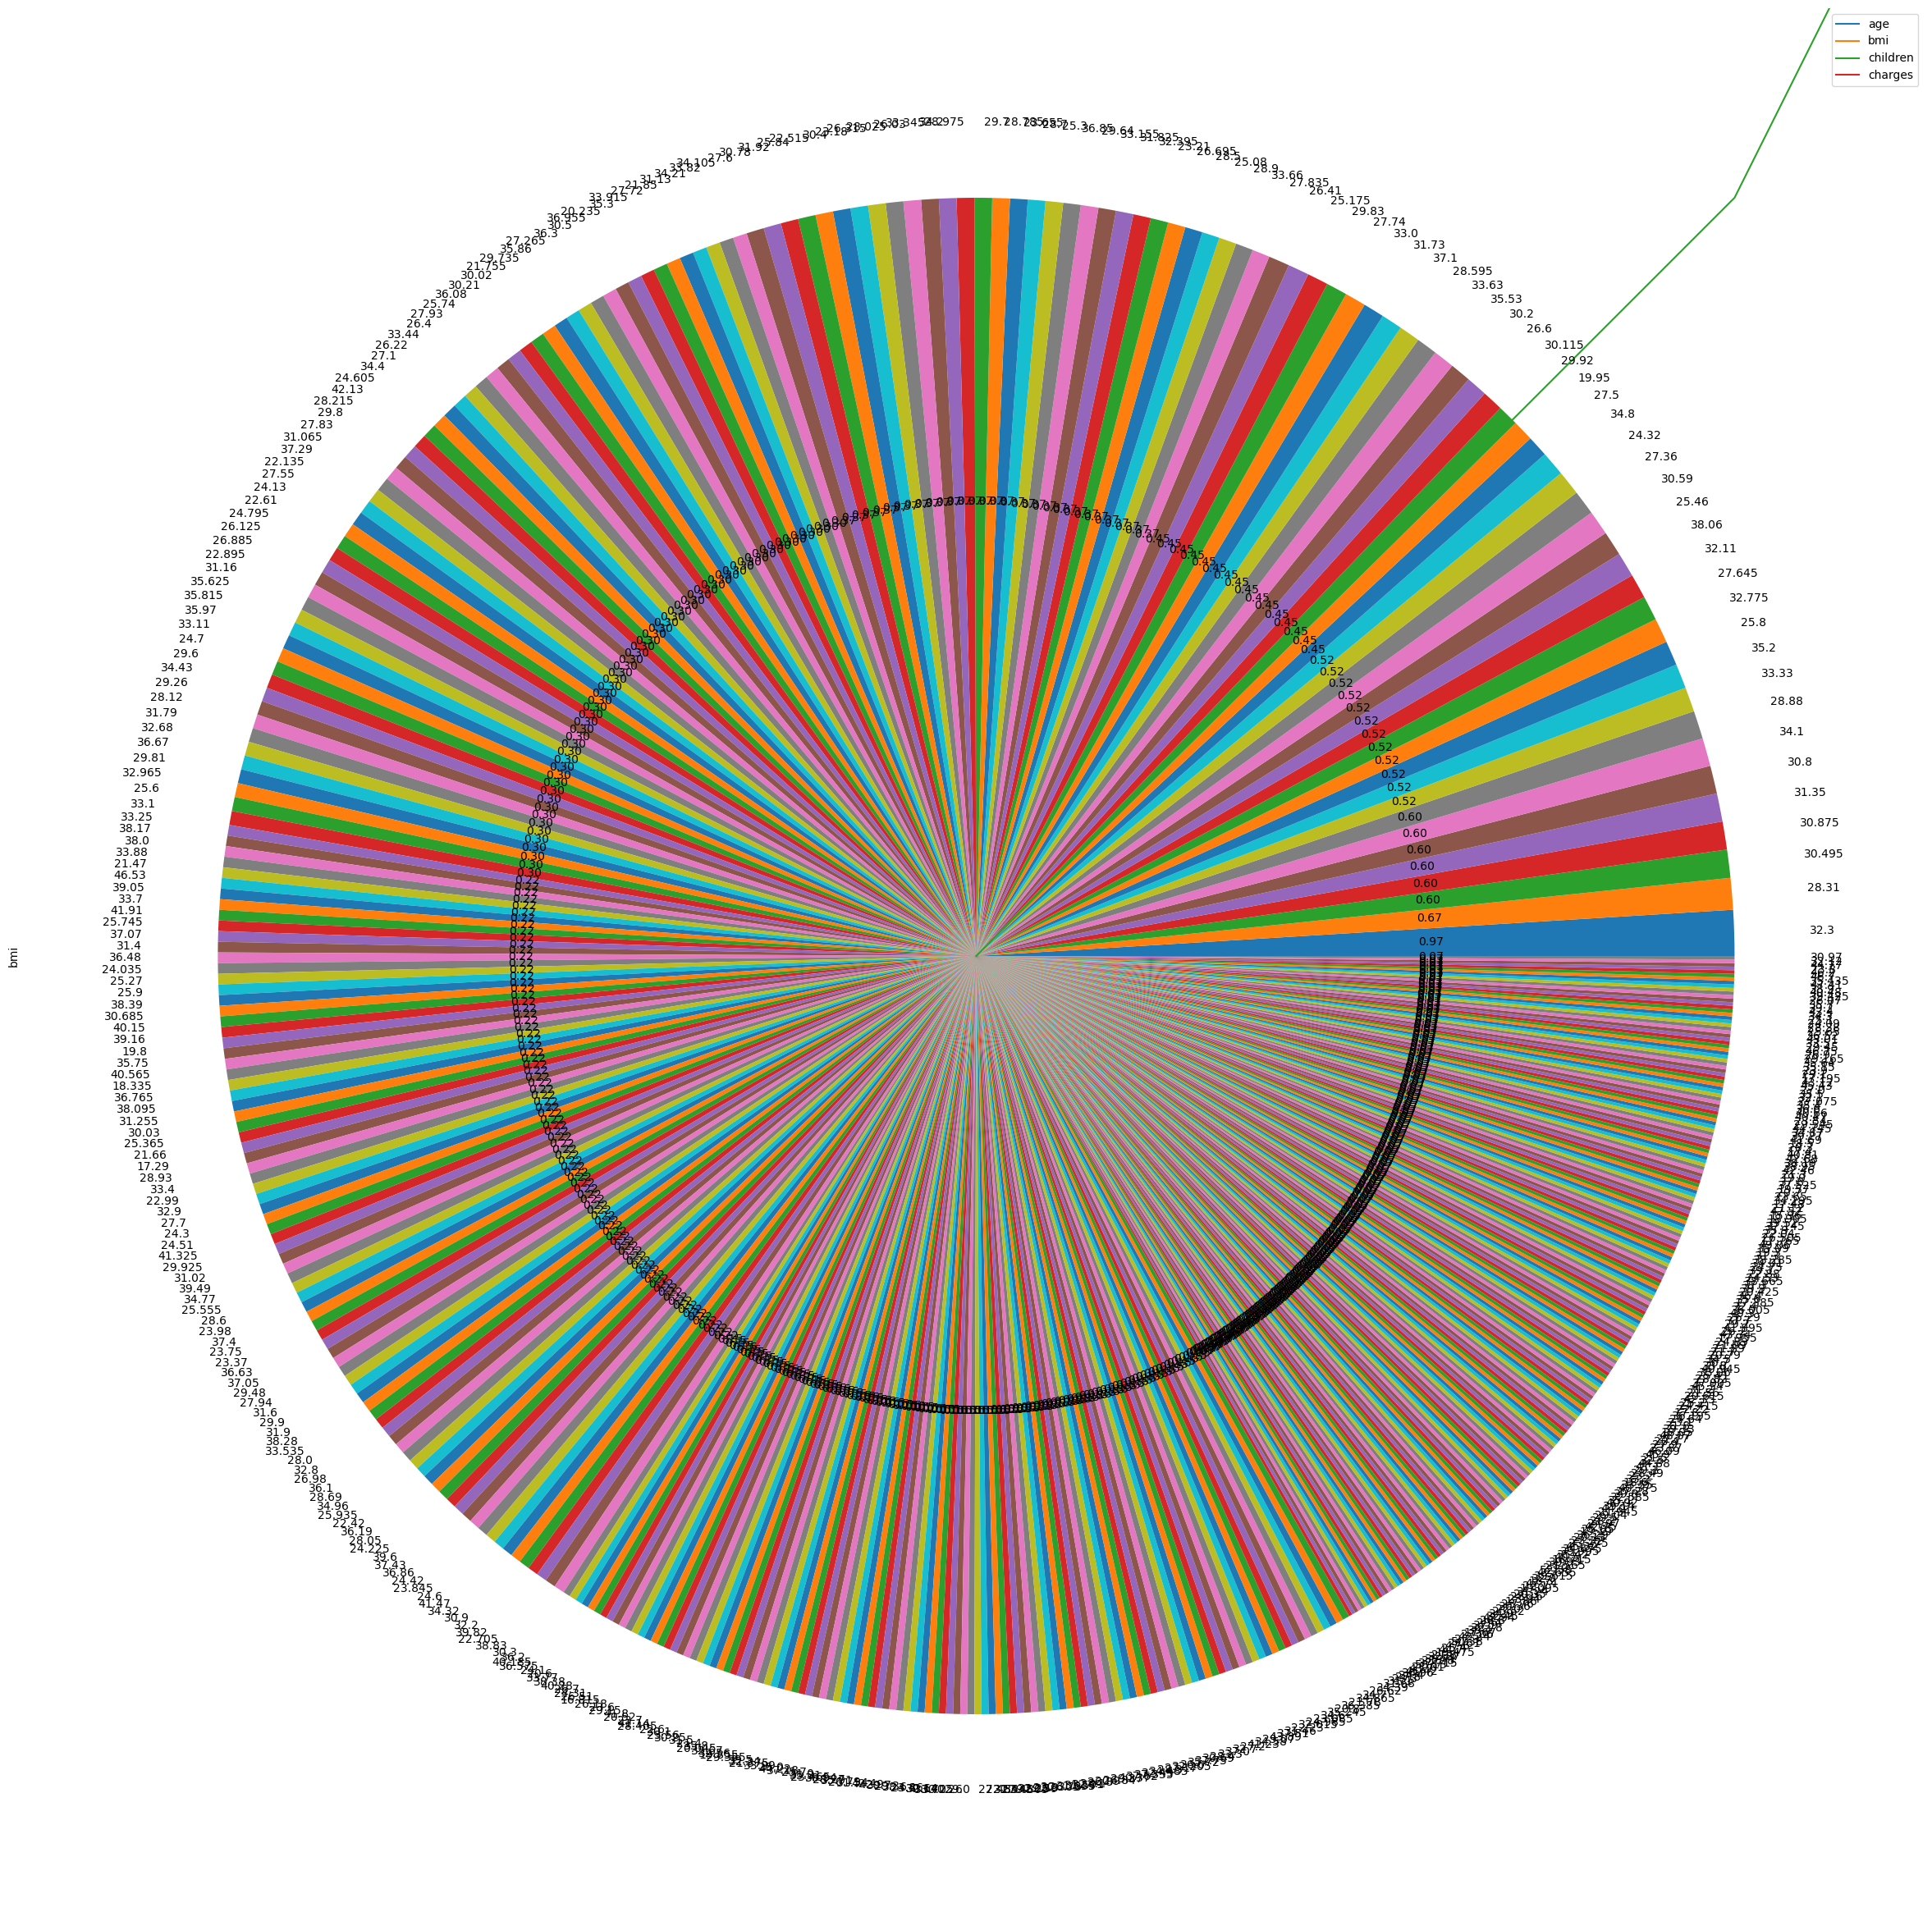

In [29]:
data.plot(figsize=(30,30))
print(data['bmi'].value_counts().plot(kind='pie',autopct='%.2f'))

AxesSubplot(0.1275,0.11;0.77x0.77)


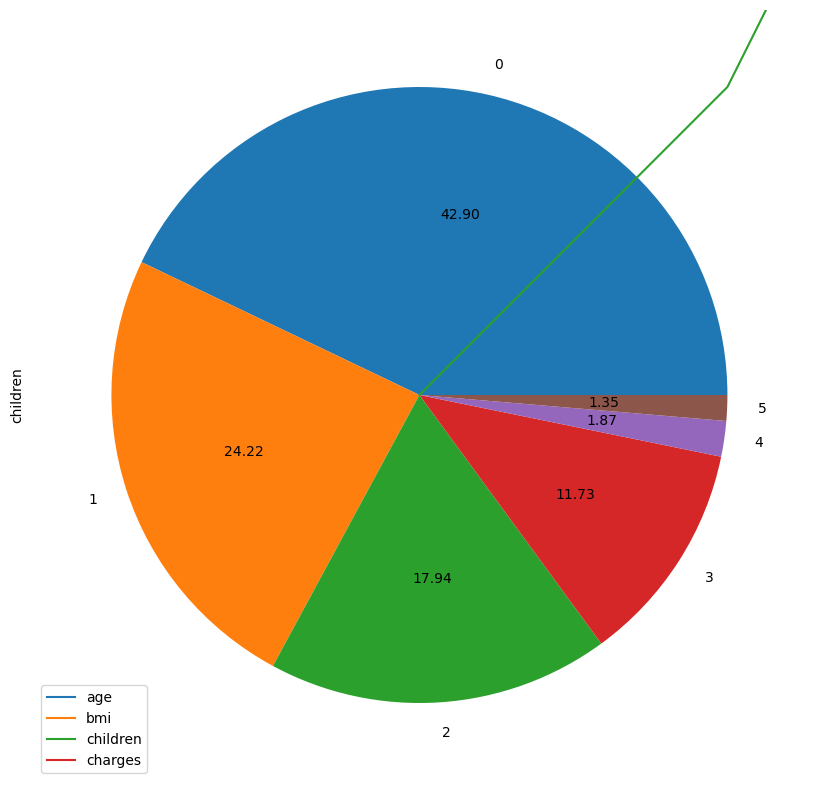

In [31]:
data.plot(figsize=(10,10))
print(data['children'].value_counts().plot(kind='pie',autopct='%.2f'))

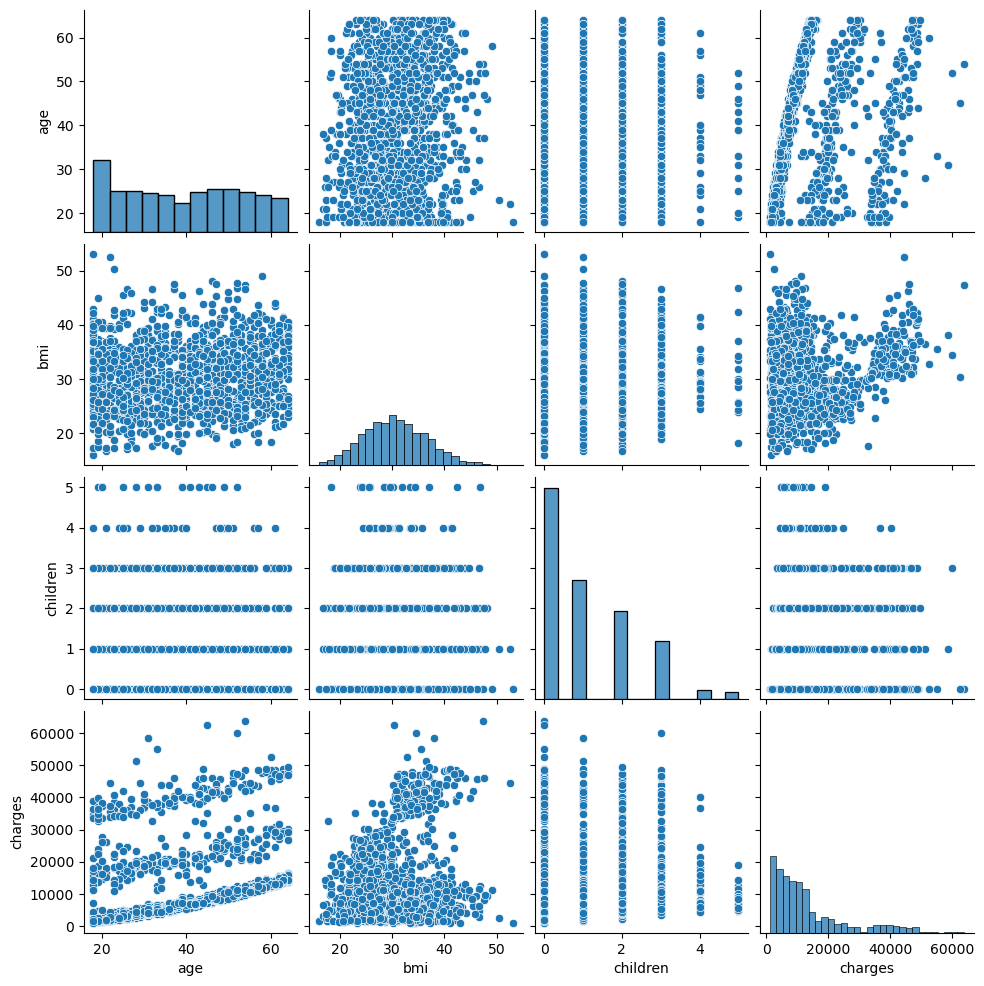

In [34]:
sns.pairplot(data)

In [69]:
data.head(9)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070

In [70]:
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
data['sex'].unique()

array([0, 1])

In [71]:
label_encoder = preprocessing.LabelEncoder()
data['smoker']= label_encoder.fit_transform(data['smoker'])
data['smoker'].unique()

array([1, 0])

In [72]:
label_encoder = preprocessing.LabelEncoder()
data['region']= label_encoder.fit_transform(data['region'])
data['region'].unique()

array([3, 2, 1, 0])

In [40]:
#data = data.drop(['bmi','charges'],axis=1)

In [73]:
data.head(4)

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061

# Splitting Data (ML)

In [88]:
df = ['age','children','sex','region','bmi','charges']

x = data[df]

y = data['smoker']

In [89]:
x_train, x_test , y_train , y_test = train_test_split ( x, y, test_size=0.2)

In [90]:
x_train.shape

(1070, 6)

In [91]:
y_train.shape

(1070,)

In [92]:
x_test.shape

(268, 6)

In [93]:
y_test.shape

(268,)

# SVC Model (acc 94%)

In [94]:
from sklearn.svm import SVC
Model = SVC()

In [95]:
Model.fit(x_train,y_train)

SVC()

In [96]:
print(Model.score(x_train,y_train))

0.9177570093457944


In [97]:
y_pred = Model.predict(x_test)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.98      0.93      0.96       209

           1       0.80      0.95      0.87        59



    accuracy                           0.94       268

   macro avg       0.89      0.94      0.91       268

weighted avg       0.94      0.94      0.94       268




# RandomForest Classifier Model (acc 95%)


In [99]:
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier()

In [100]:
Model.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
print(Model.score(x_train,y_train))

1.0


In [102]:
y_pred = Model.predict(x_test)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.97      0.97      0.97       209

           1       0.88      0.88      0.88        59



    accuracy                           0.95       268

   macro avg       0.92      0.92      0.92       268

weighted avg       0.95      0.95      0.95       268




# Decision Tree Classifier Model (acc 95%)

In [104]:
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()

In [105]:
Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
print(Model.score(x_train,y_train))

1.0


In [107]:
y_pred = Model.predict(x_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.96      0.97      0.97       209

           1       0.89      0.86      0.88        59



    accuracy                           0.95       268

   macro avg       0.93      0.92      0.92       268

weighted avg       0.95      0.95      0.95       268




# KNeighbors Classifier Model (acc 91%)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier()

In [111]:
Model.fit(x_train,y_train)

KNeighborsClassifier()

In [112]:
print(Model.score(x_train,y_train))

0.9429906542056075


In [113]:
y_pred = Model.predict(x_test)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.95      0.94      0.94       209

           1       0.80      0.81      0.81        59



    accuracy                           0.91       268

   macro avg       0.87      0.88      0.88       268

weighted avg       0.91      0.91      0.91       268




# Thank You !